In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set() # overwrite matplotlib

# Load the Data

In [2]:
df = pd.read_csv('billboard_features.csv')
spot = df[(df['sp_title'] != 'unknown') & (df['year'] > 1950)]
spot.describe()

,year,rank,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,6834.000000,6834.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6.833000e+03,6833.000000
mean,1989.364062,49.091016,0.621256,0.606607,5.254647,-8.538887,0.700571,0.072546,0.289062,0.029335,0.176956,0.600383,119.510758,2.269855e+05,3.942485
std,19.780924,29.025570,0.154102,0.196958,3.575976,3.608282,0.458042,0.079497,0.280243,0.131513,0.143296,0.241367,28.204363,6.578194e+04,0.301828
min,1951.000000,1.000000,0.000000,0.024800,0.000000,-29.519000,0.000000,0.000000,0.000016,0.000000,0.012400,0.000000,0.000000,2.968800e+04,0.000000
25%,1972.000000,24.000000,0.523000,0.468000,2.000000,-10.863000,0.000000,0.032200,0.050000,0.000000,0.086700,0.411000,98.155000,1.833070e+05,4.000000
50%,1990.000000,48.000000,0.635000,0.623000,5.000000,-7.964000,1.000000,0.041600,0.189000,0.000003,0.122000,0.619000,118.068000,2.229730e+05,4.000000
75%,2006.000000,74.000000,0.730000,0.761000,8.000000,-5.741000,1.000000,0.069700,0.487000,0.000281,0.225000,0.806000,135.028000,2.586670e+05,4.000000
max,2023.000000,100.000000,0.988000,0.996000,11.000000,-0.810000,1.000000,0.915000,0.995000,0.972000,0.982000,0.993000,232.473000,1.561133e+06,5.000000


I want to check out how audio features have changed since 1951. You can find what each feature means on Spotify's developer website [[1]](https://developer.spotify.com/documentation/web-api/reference/get-audio-features). I’ll calculate the average of each feature for all the songs, looking at it as a snapshot of popular tracks for that year. Plus, I’ll add a second line in the graph for the average of the top 10 songs of the year to see how those features really stand out.

In [3]:
# a function to plot the mean of a feature of popular songs throughout the years 
def plot_feature(ft, df=spot,lim=(0.,1.)):
    
    data = df[['year', ft]]
    data10 = df[df['rank']<=10][['year', ft]]
    
    data_avg = data.groupby(['year'], as_index=False).mean()
    data10_avg = data10.groupby(['year'], as_index=False).mean()
    
    data_avg['type'] = 'All Tracks'
    data10_avg['type'] = 'Top 10 Tracks'
                                
    combined = pd.concat([data_avg, data10_avg])

    # Create the line plot
    plt.figure(figsize=(10, 6))
    
    sns.lineplot(data=combined, x='year', y=ft, hue='type')
    plt.title(ft + ' throughout the years')
    plt.xlabel("")
    plt.ylabel(ft)
    if lim != 0:
        plt.ylim(lim)
    plt.legend(title='Data Used')
    plt.show()

# Danceability
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

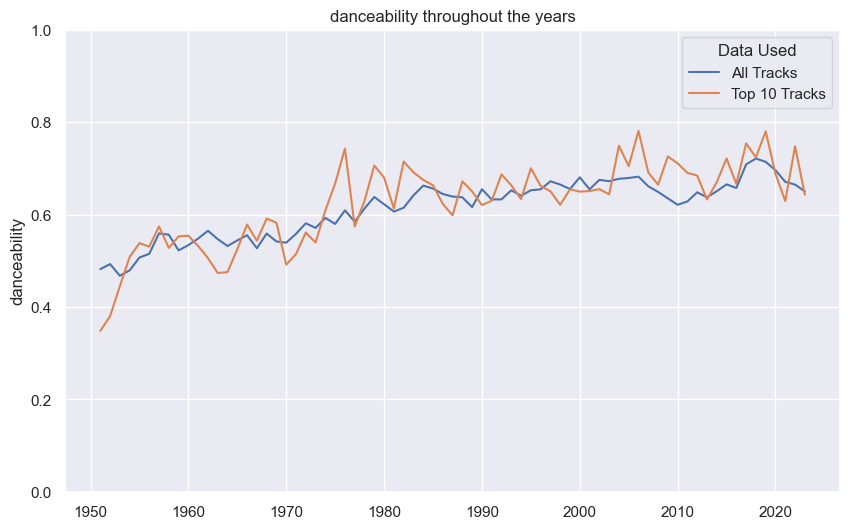

In [4]:
plot_feature('danceability')

Overall, danceability scores have shown a steady increase from 1951 to now. There were slight drops in the late 2000s and the last three years, but the scores are still higher than in earlier decades. When looking at the top 10 songs, there are noticeable spikes in danceability from the mid to late 70s, which I’d attribute to the rise of disco music during that time. Looking at the graph, it seems clear that popular music has become more danceable over the years.

# Energy
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

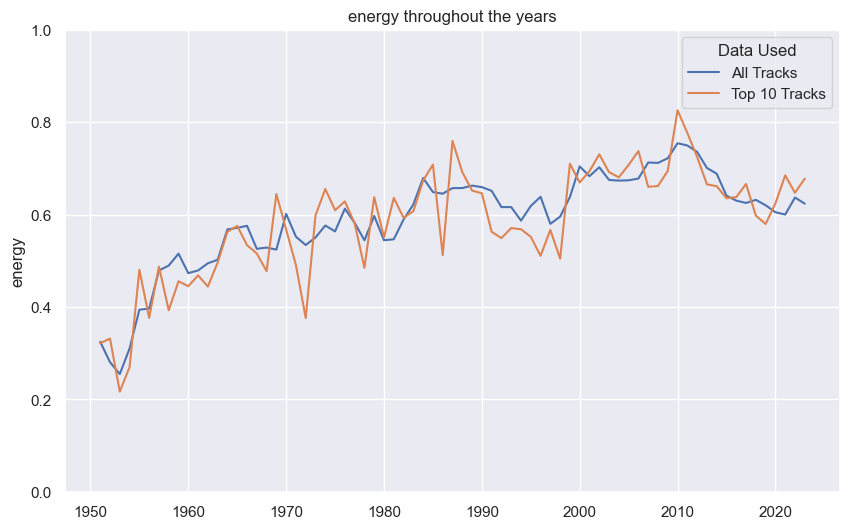

In [5]:
plot_feature('energy')

The energy level of popular songs has been on the rise since 1951. There have been some drops, particularly in the 90s and again in the 2010s. I'm not sure what happened in the early '90s, but many of the top 10 songs were ballads or slower tracks, like Ace of Base and Celine Dion in 1994 and Mariah Carey and Boyz II Men in 1996. Maybe it was because it was a relatively peaceful decade after World War II and the Cold War, so people felt more relaxed—but I might be stretching that idea a bit. The energy levels picked back up in the mid-90s and early 2000s, probably thanks to the rise of boy bands, girl bands, and pop stars like Britney Spears.

# Loudness
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

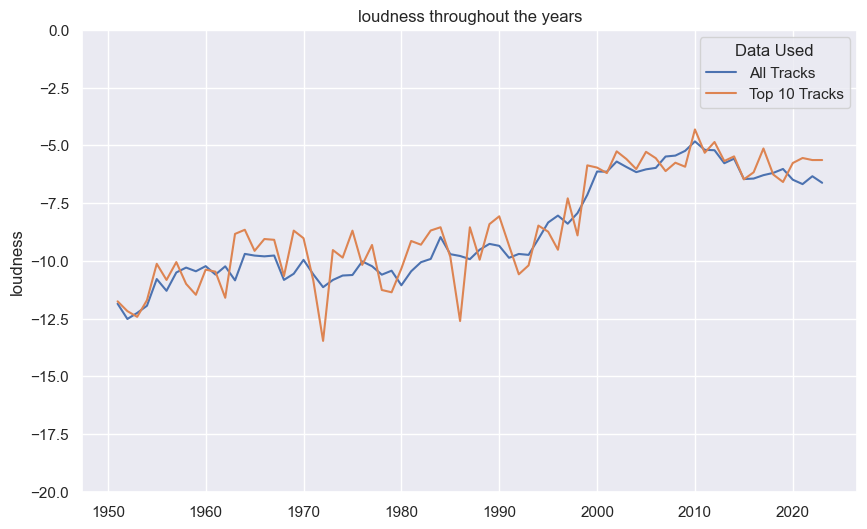

In [6]:
plot_feature('loudness', lim=(-20.0,0))

The loudness level in popular music was stable until the 90s when it started to increase. I’m not exactly sure why this happened, but it could be tied to the same factors that boosted energy levels, like the rise of boy bands and Britney Spears. Since then, the loudness level has stabilized again up to the present day.

# Speechiness
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

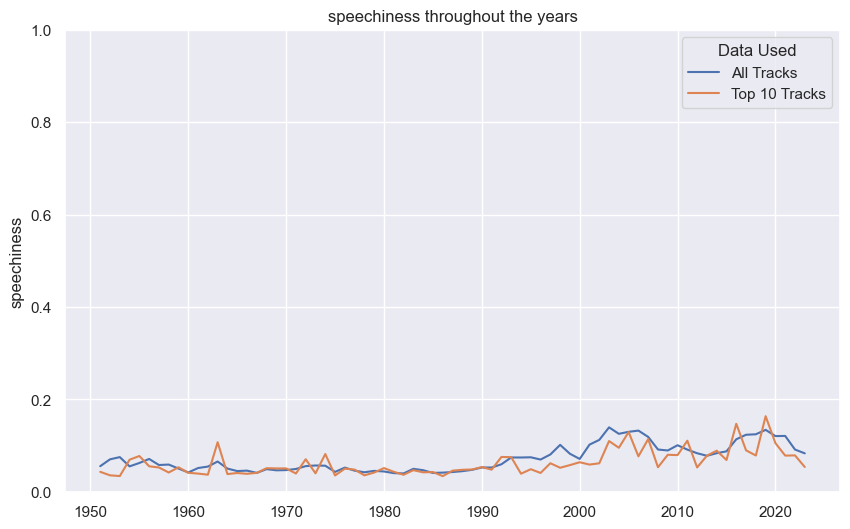

In [7]:
plot_feature('speechiness')

Popular music's level of speechiness has remained constant over the years. However, there's been a slight rise since the 90s, which I'd attribute to the growth of rap and hip hop, which typically include many lyrics.

# Acousticness
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

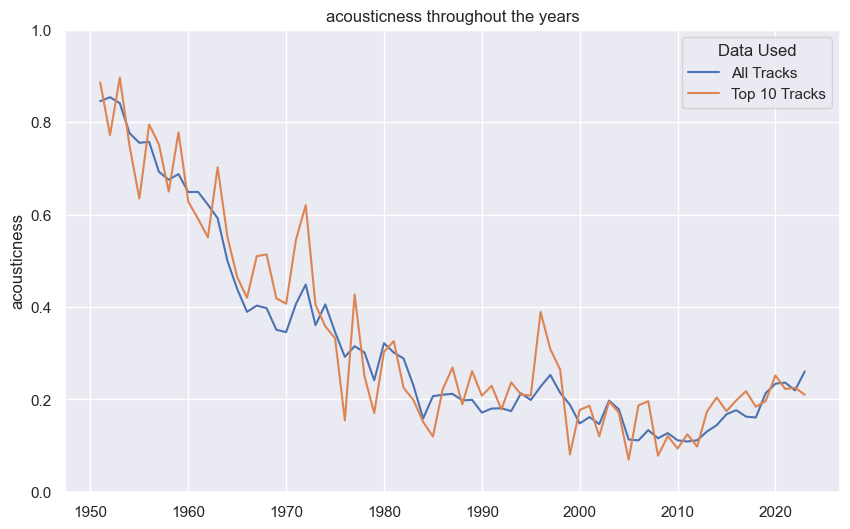

In [8]:
plot_feature('acousticness')

The level of acousticness in popular music has been declining since 1951, though there’s been a slight uptick since 2010. I think this decline is due to the shift from acoustic to electronic music over the years, as electronic music has been improving in quality all along.

# Instrumentalness
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

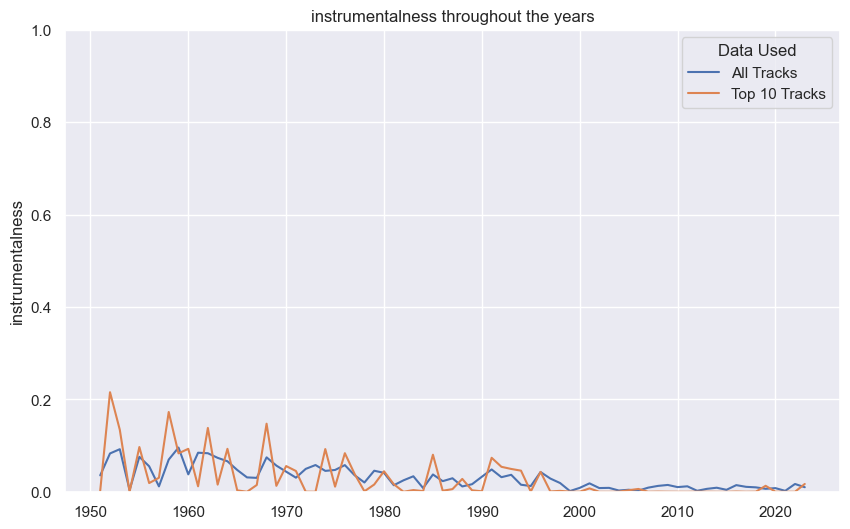

In [9]:
plot_feature('instrumentalness')

No year has seen a mean instrumentalness level above 0.5, which shows that popular music has never been mainly instrumental. It seems like older music has a slightly higher instrumental level than tracks released after 2000, likely because many older songs featured instrumental solos, like guitar or drum solos. Unsurprisingly, the graph for instrumentalness looks pretty much the opposite of the one for speechiness.

# Liveness
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

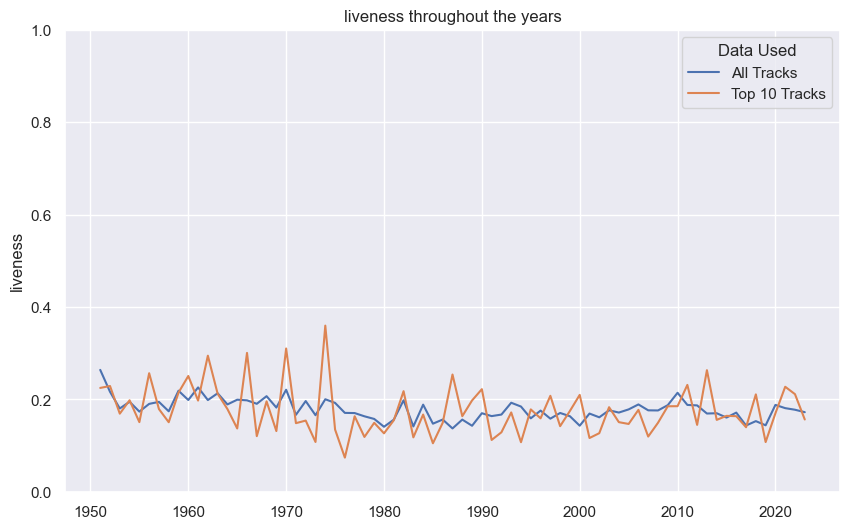

In [10]:
plot_feature('liveness')

The level of liveness in popular music has remained constant over the years. Not much can be inferred from this, except that even since 1951, people seem to prefer initially recording music rather than live performance recordings.

# Valence
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

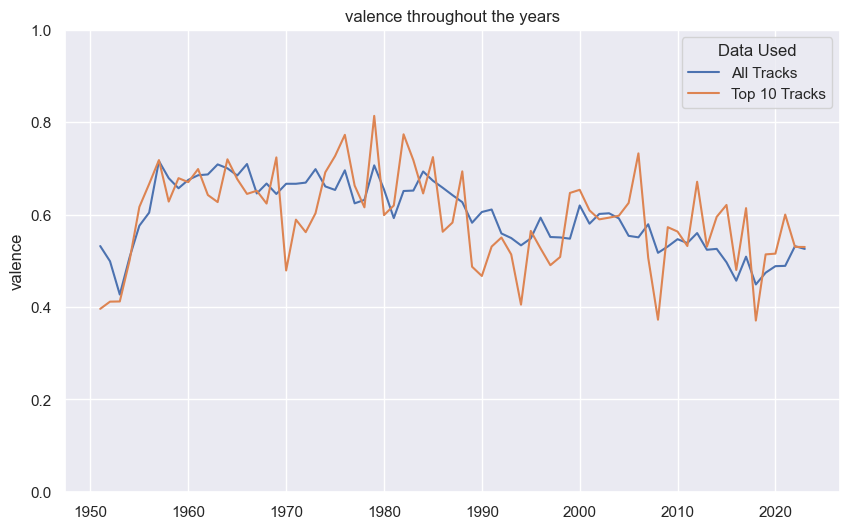

In [11]:
plot_feature('valence')

When looking at the valence level, we've favoured happy music right from the start, as the valence level is above 0.5 most of the time. There was a slight dip in the early to mid-90s, but it stayed above that. Another small drop happened in the 2010s, which suggests that people were into slightly sadder music during that decade, although the difference isn't huge. 

The noticeable drop in the top 10 tracks line in 2008 can be traced back to "Apologize" by Timbaland and OneRepublic, which has a meagre valence score, along with "Bleeding Love" by Leona Lewis and "No One" by Alicia Keys. Similarly, the drop in 2018 is linked to the low valence scores of "Perfect" by Ed Sheeran and "Rockstar" by Post Malone and 21 Savage.

# Tempo
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

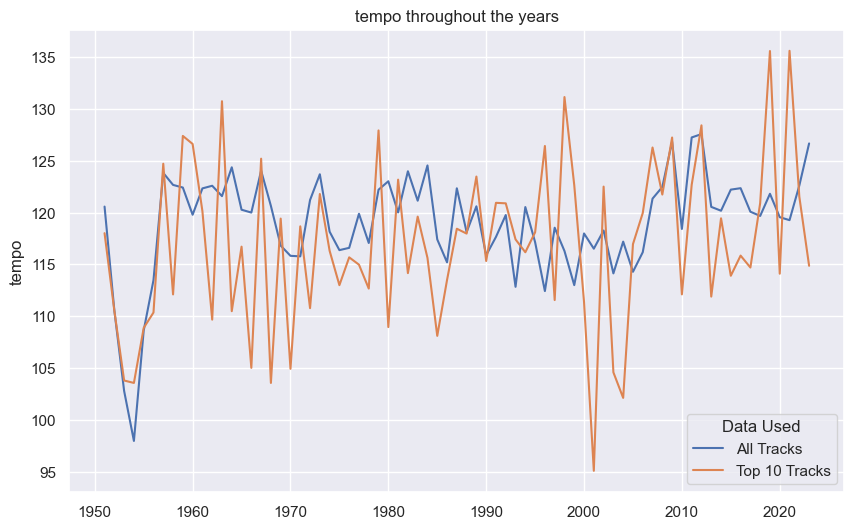

In [12]:
plot_feature('tempo', lim=0)

The tempo in popular music has remained consistent over the years, usually around 110-125 bpm, which is a typical range for pop music [[2]](https://www.masterclass.com/articles/how-to-find-the-bpm-of-a-song).

# Duration
The duration of the track in milliseconds. I converted the duration to minutes.

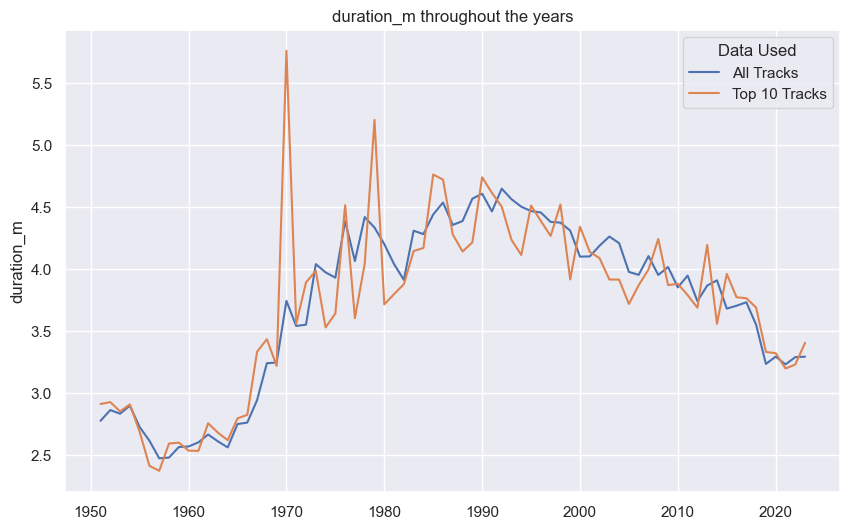

In [13]:
dur = spot[['year', 'rank', 'duration_ms']]
dur = dur.copy()
dur['duration_m'] = dur['duration_ms'] / 1000 / 60
plot_feature('duration_m',dur,0)

Music lengths in the 1950s and 1960s were generally short because vinyl limited how much music it could hold. However, the length started to increase, peaking in the 80s as technology improved with cassettes and CDs. From the 1990s onward, the length of popular songs began to drop again, mainly because radio stations favoured shorter tracks [[3]](https://www.washingtonpost.com/entertainment/interactive/2024/shorter-songs-again/). By the 2010s, the average length of popular music was back to levels seen in the late 60s. This shift was partly due to streaming services making it easier to listen to and skip songs quickly, meaning artists needed to grab listeners' attention quickly. The rise of short-form content, like TikTok, which frequently features pop music, likely played a role too. 

Notably, there were spikes in song lengths in the top 10 tracks of the 1970s, such as "Get Ready" by Rare Earth at 21.5 minutes long and "Ring My Bell" by Anita Ward at 8.2 minutes.

# Key
The key the track is in. Integers map to pitches using standard [Pitch Class notation](https://en.wikipedia.org/wiki/Pitch_class). E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

For this case, I created a heatmap

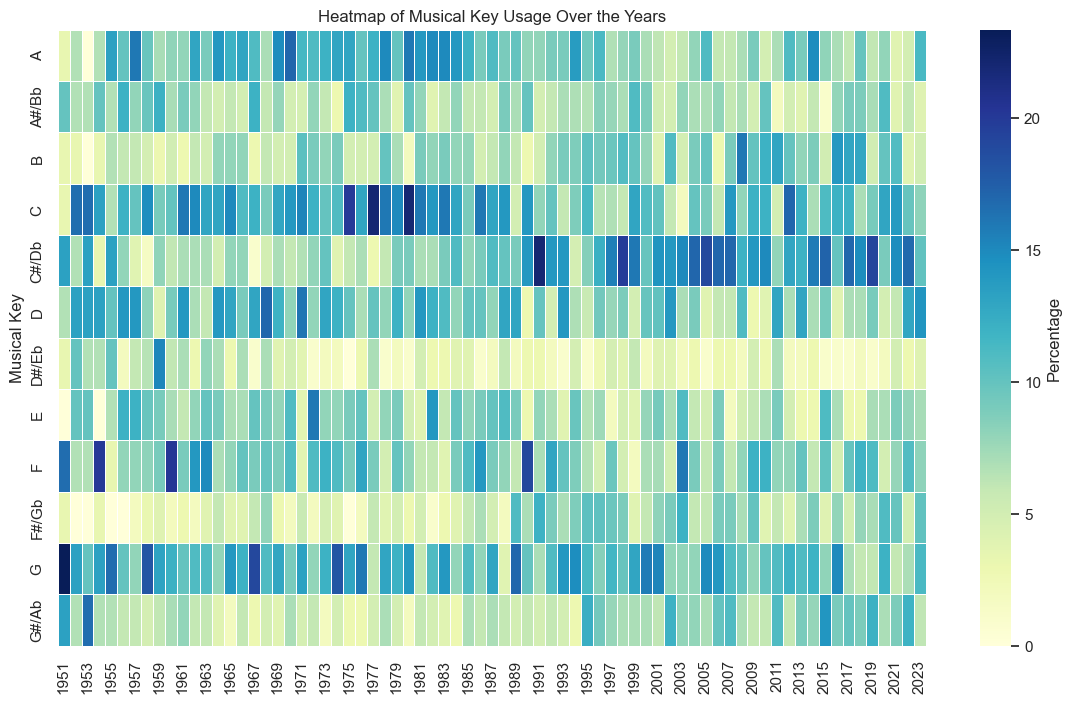

In [14]:
# use only the needed features
key_df = spot[['year', 'rank', 'key']]

# map the keys
key_mapping = {
    
    0: 'C', 1: 'C#/Db', 2: 'D', 3: 'D#/Eb', 4: 'E', 5: 'F',
    6: 'F#/Gb', 7: 'G', 8: 'G#/Ab', 9: 'A', 10: 'A#/Bb', 11: 'B'
}

# represent the data into percentage
key_df = key_df.copy()
key_df['key_name'] = key_df['key'].map(key_mapping)
key_dist = key_df.groupby(['year', 'key_name']).size().unstack(fill_value=0)
key_pnt = key_dist.div(key_dist.sum(axis=1), axis=0) * 100

# plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(key_pnt.T, cmap='YlGnBu', annot=False, linewidths=.5, cbar_kws={'label': 'Percentage'})
plt.title('Heatmap of Musical Key Usage Over the Years')
plt.xlabel('')
plt.ylabel('Musical Key')
plt.show()

I noticed that some keys, like G, C, and C#/Db, consistently show up more often in popular music over the years. There seems to be a shift in the late 80s and early 90s, where the dominant key changed from C to C#/Db. I don’t have enough musical knowledge to draw personal conclusions, but it seems like these keys are commonly used in popular songs [[4]](https://www.quora.com/What-is-the-most-used-key-in-music-What-key-are-most-guitar-songs-in).

# Mode
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

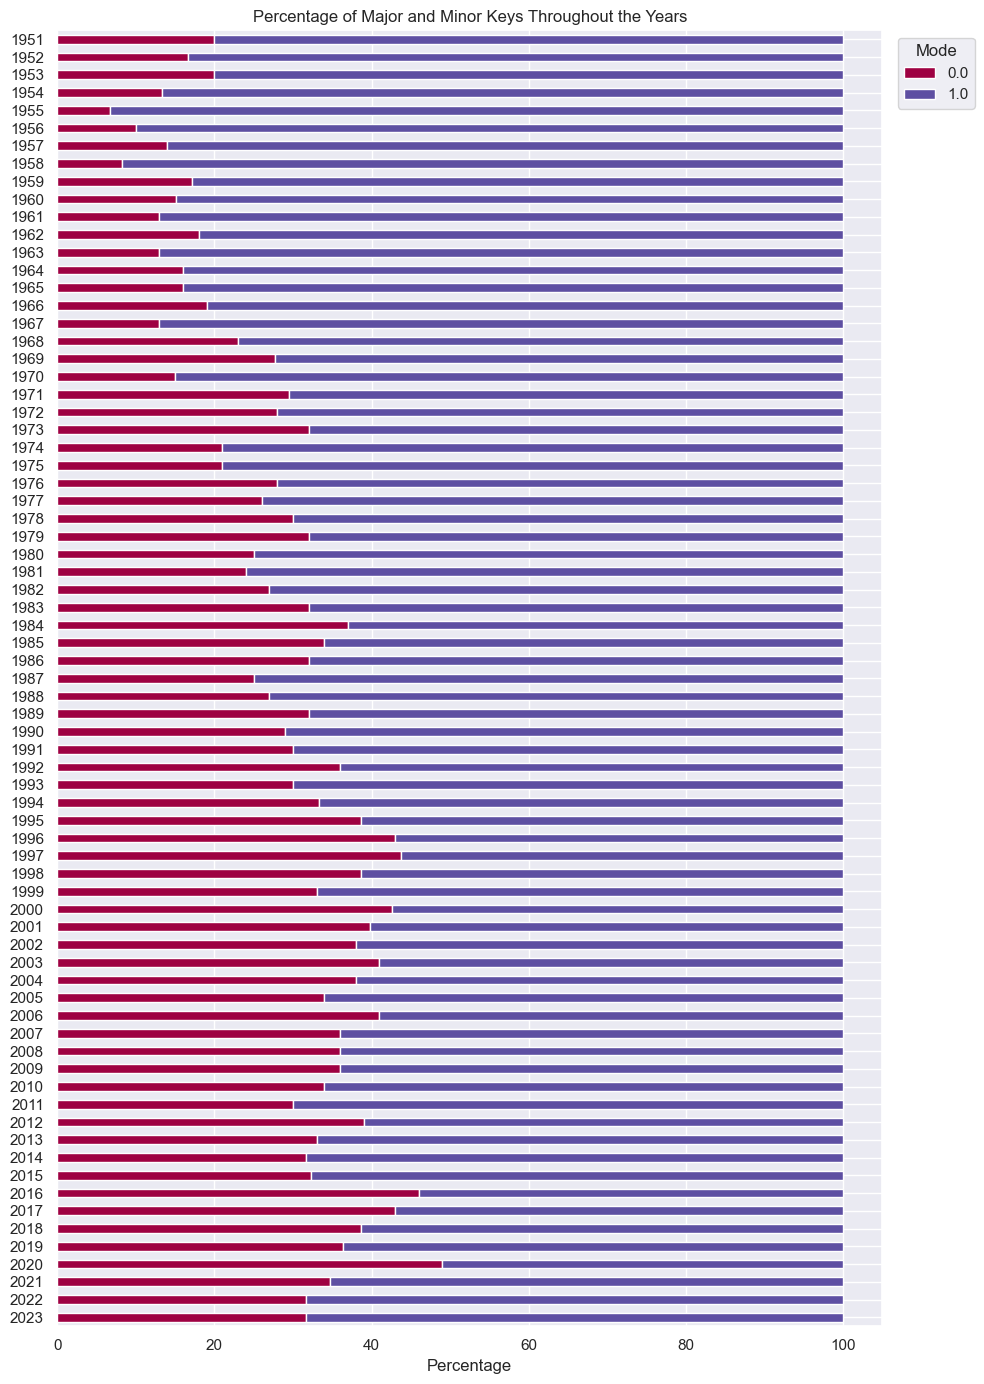

In [15]:
# use only the needed features
mode_df = spot[['year', 'rank', 'mode']]

# represent the data into percentage
mode_dist = mode_df.groupby(['year', 'mode']).size().unstack(fill_value=0)
mode_dist = mode_dist.sort_index(ascending=False)
mode_pnt = mode_dist.div(mode_dist.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
mode_pnt.plot(kind='barh', stacked=True, figsize=(10, 14), colormap='Spectral')
plt.title('Percentage of Major and Minor Keys Throughout the Years')
plt.xlabel('Percentage')
plt.ylabel('')
plt.legend(title='Mode', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Most popular music since 1951 has been in major mode, but there’s been a slight increase in the percentage of songs in minor mode. This suggests that people might be leaning a bit more toward sadder or darker-sounding music over the years.

# Time signature
An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

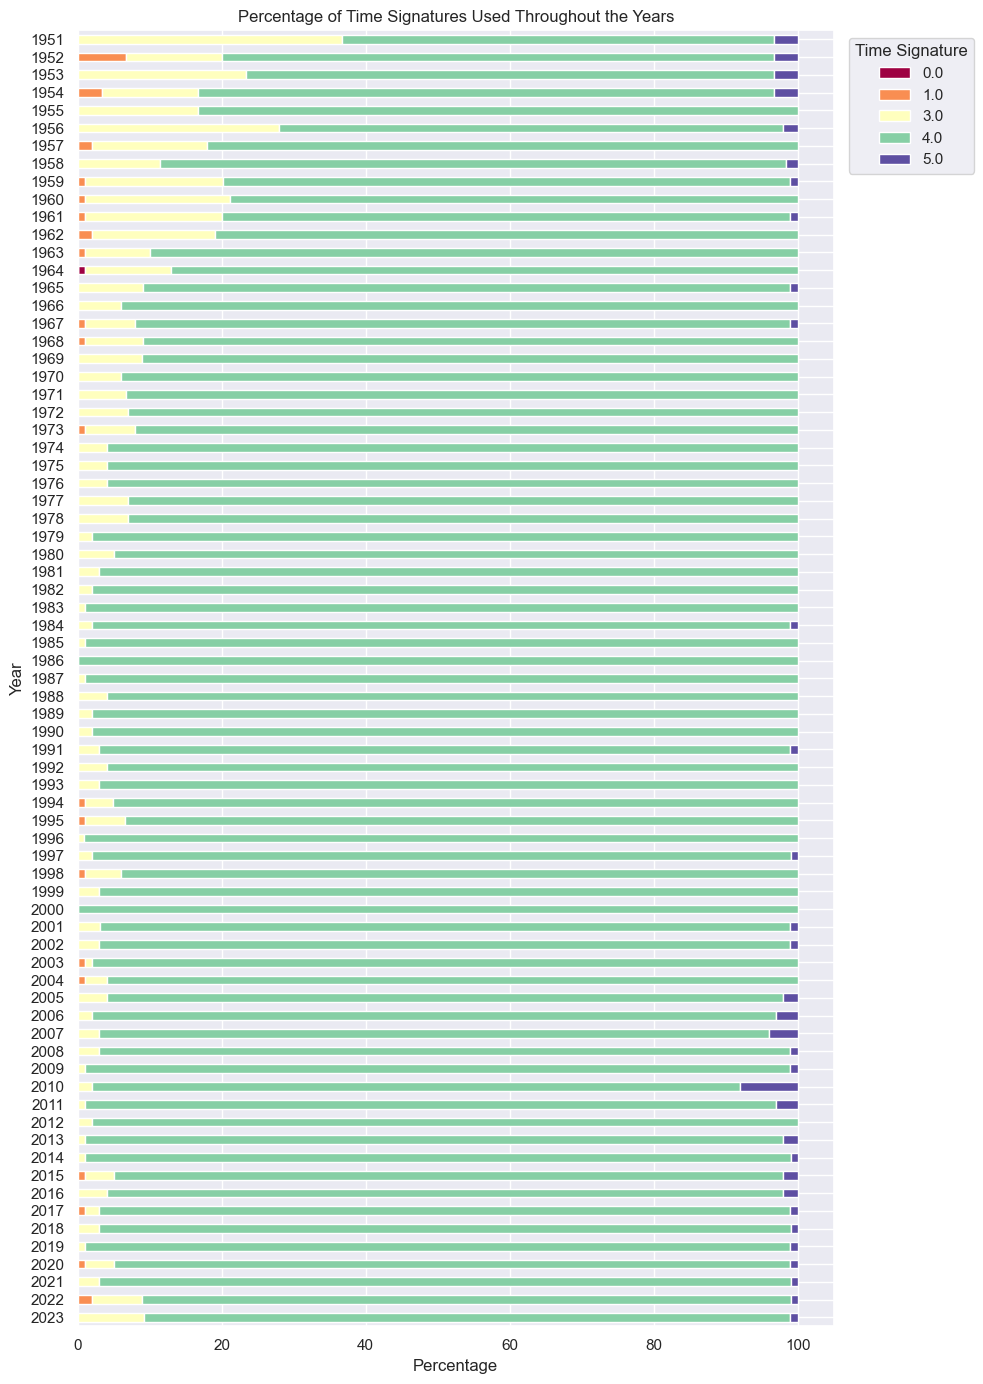

In [16]:
# use only the needed features
sign_df = spot[['year', 'rank', 'time_signature']]

# represent the data into percentages
sign_dist = sign_df.groupby(['year', 'time_signature']).size().unstack(fill_value=0)
sign_dist = sign_dist.sort_index(ascending=False)
sign_pnt = sign_dist.div(sign_dist.sum(axis=1), axis=0) * 100

# plot
sign_pnt.plot(kind='barh', stacked=True, figsize=(10, 14), colormap='Spectral')
plt.title('Percentage of Time Signatures Used Throughout the Years')
plt.xlabel('Percentage')
plt.ylabel('Year')
plt.legend(title='Time Signature', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Most music, especially pop, is typically in a 4/4 time signature, but it's interesting that it hasn’t always been like that. In the 50s and 60s, around 20-30 percent of popular music was in other time signatures, with 3/4 being the most common.

# Conclusion

Looking at the graphs, it’s clear that certain features of popular music have changed over the years, while others have stayed pretty much the same. The features that have changed a lot include duration and acousticness. Features that have seen only slight changes are danceability, energy, loudness, valence, key, mode, and time signature. Meanwhile, features that have remained relatively constant are speechiness, instrumentalness, liveness, and tempo.

One notable thing is that most changes have been consistent until around 2010. For instance, acousticness had declined since 1951 but increased again in 2010. A similar trend can be seen with loudness and energy, which rose slightly until 2010 and then began to dip. This shift likely coincides with the rise of Spotify, which made discovering and listening to a more diverse range of music more accessible, expanding what mainstream audiences had access to beyond what traditional media provided.

### Disclaimer
These insights are based solely on observations from graphs. More accurate analyses could be achieved by applying inferential statistical or machine learning methods, which I plan to explore in the future. I also want to note that I don’t have any professional experience in music, so these insights come from the perspective of a casual music listener.